<a href="https://colab.research.google.com/github/111Vidya/DS-Assignments/blob/main/Assignment_MultiLinear_Regression_50Startup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [ ]:
su=pd.read_csv("50_Startups.csv")
su

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
su.shape

(50, 5)

In [ ]:
su.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [ ]:
su.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [ ]:
su.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
su.isnull()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [ ]:
su.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
su.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
su["State"].mode()

0    California
1      New York
Name: State, dtype: object

In [ ]:
su.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


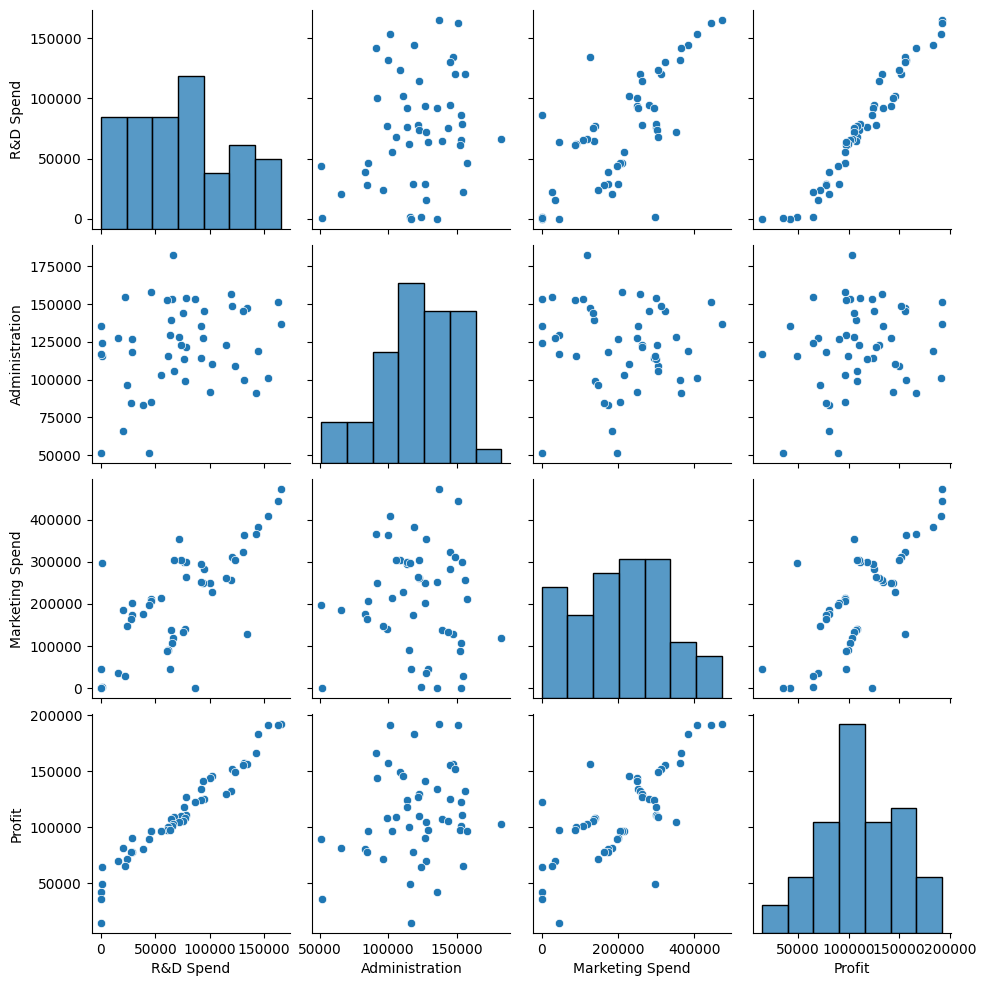

In [ ]:
sns.pairplot(su)

{'whiskers': [<matplotlib.lines.Line2D at 0x7b1dcd897670>,
 'caps': [<matplotlib.lines.Line2D at 0x7b1dcd897bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b1dcd8973d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b1dcd8c0130>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b1dcd9f4d60>],
 'means': []}

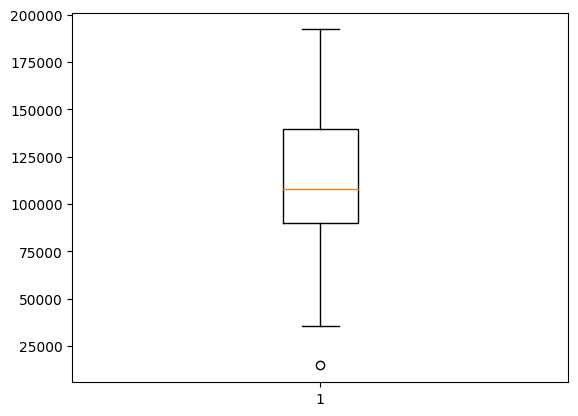

In [ ]:
import warnings
warnings.filterwarnings("ignore")
plt.boxplot(su["Profit"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7b1dcd914a00>,
 'caps': [<matplotlib.lines.Line2D at 0x7b1dcd914f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b1dcd914850>],
 'medians': [<matplotlib.lines.Line2D at 0x7b1dcd915480>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b1dcd915720>],
 'means': []}

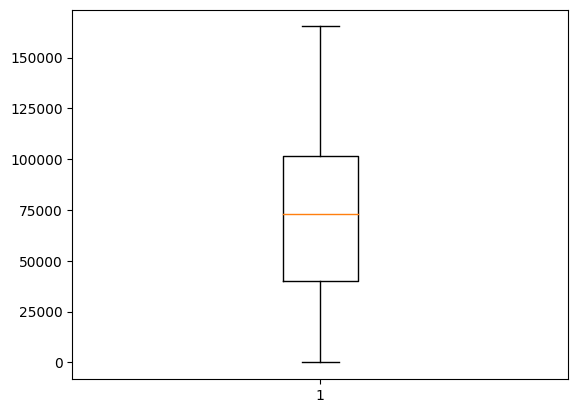

In [ ]:
plt.boxplot(su["R&D Spend"])

<Axes: xlabel='Administration', ylabel='Density'>

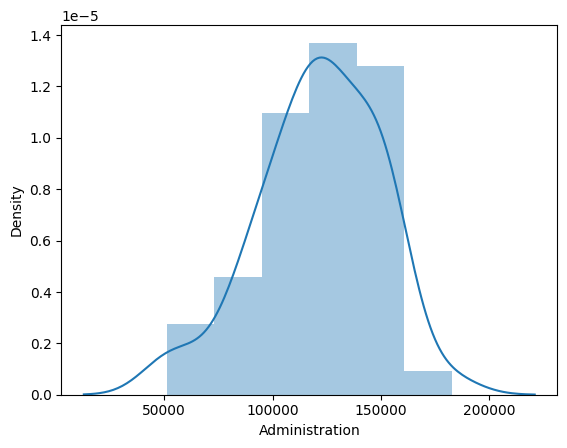

In [ ]:
sns.distplot(su["Administration"])

<Axes: xlabel='State', ylabel='Count'>

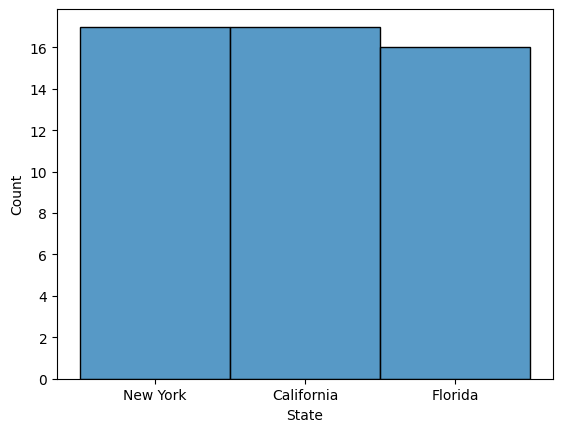

In [ ]:
sns.histplot(su["State"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7b1dcd861cf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b1dcd7eb1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b1dcd861a50>],
 'medians': [<matplotlib.lines.Line2D at 0x7b1dcd8618a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b1dcd861f60>],
 'means': []}

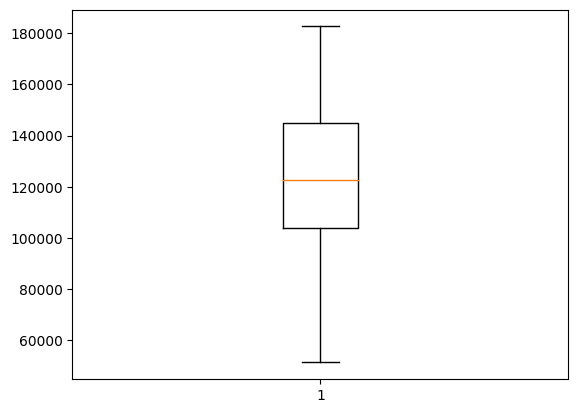

In [ ]:
plt.boxplot(su["Administration"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7b1dcdc9cd90>,
 'caps': [<matplotlib.lines.Line2D at 0x7b1dcdc9ded0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b1dcdc9c520>],
 'medians': [<matplotlib.lines.Line2D at 0x7b1dcdc9e1a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b1dcdc9c790>],
 'means': []}

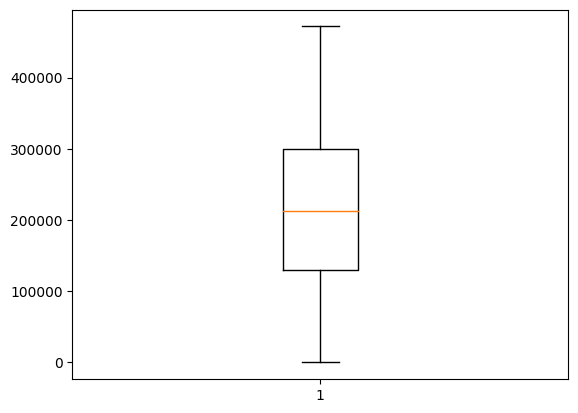

In [ ]:
plt.boxplot(su["Marketing Spend"])

In [ ]:
su1=su.rename({"R&D Spend":"RDSpend","Marketing Spend":"MarketingSpend"},axis=1)
su1.head()

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
#R-squared and Adj R-squared values are at 95% and depicts strong prediction power
import statsmodels.formula.api as smf
model=smf.ols('Profit~Administration+RDSpend+MarketingSpend',data=su1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           4.53e-30
Time:                        17:14:09   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
RDSpend            0.8057      0.045     17.846      0.000       0.715       0.897
MarketingSpend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model.params

Intercept         50122.192990
Administration       -0.026816
RDSpend               0.805715
MarketingSpend        0.027228
dtype: float64

In [ ]:
#PValues for Administartion and MarketingSpend is >0.05 hence insignificant
model.pvalues

Intercept         1.057379e-09
Administration    6.017551e-01
RDSpend           2.634968e-22
MarketingSpend    1.047168e-01
dtype: float64

Simple Linear regression on independent Variables

In [ ]:
#PValue of R&D Spend is <0.05 hence significant
model_RD=smf.ols("Profit~RDSpend",data=su1).fit()
print(model_RD.tvalues,'\n',model_RD.pvalues)

Intercept    19.320288
RDSpend      29.151139
dtype: float64 
 Intercept    2.782697e-24
RDSpend      3.500322e-32
dtype: float64


In [ ]:
#PValue of Administration Spend is >0.05 and hence not a significant variable
model_Admin=smf.ols("Profit~Administration",data=su1).fit()
print(model_Admin.tvalues,'\n',model_Admin.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [ ]:
#Market Spend has a PValue <0.05 will be considered significant variable in predicting profits
model_Market=smf.ols("Profit~MarketingSpend",data=su1).fit()
print(model_Market.tvalues,'\n',model_Market.pvalues)

Intercept         7.808356
MarketingSpend    7.802657
dtype: float64 
 Intercept         4.294735e-10
MarketingSpend    4.381073e-10
dtype: float64


In [ ]:
#PValue when combining Administration and Marketing Spend is <0.05 is significant
model_Admin_Market=smf.ols("Profit~Administration+MarketingSpend",data=su1).fit()
print(model_Market.tvalues,'\n',model_Market.pvalues)

Intercept         7.808356
MarketingSpend    7.802657
dtype: float64 
 Intercept         4.294735e-10
MarketingSpend    4.381073e-10
dtype: float64


Calculate VIF-Variable Inflation Factor

In [ ]:
rsq_RDSpend=smf.ols("RDSpend~Administration+MarketingSpend",data=su1).fit().rsquared
vif_RDSpend=1/(1-rsq_RDSpend)
vif_RDSpend

2.4689030699947017

In [ ]:
rsq_Administration=smf.ols("Administration~RDSpend+MarketingSpend",data=su1).fit().rsquared
vif_Administration=1/(1-rsq_Administration)
vif_Administration

1.1750910070550453

In [ ]:
rsq_MarketingSpend=smf.ols("MarketingSpend~Administration+RDSpend",data=su1).fit().rsquared
vif_MarketingSpend=1/(1-rsq_MarketingSpend)
vif_MarketingSpend

2.326773290530878

In [ ]:
# Storing vif values in a data frame.Greater VIF can be removed, in the below case
su2={"Variables":["RDSpend","Administration","MarketingSpend"],"VIF":[vif_RDSpend,vif_Administration,vif_MarketingSpend]}
su2_frame = pd.DataFrame(su2)
su2_frame

,Variables,VIF
0,RDSpend,2.468903
1,Administration,1.175091
2,MarketingSpend,2.326773


Residual Plot for Homoscedasticity

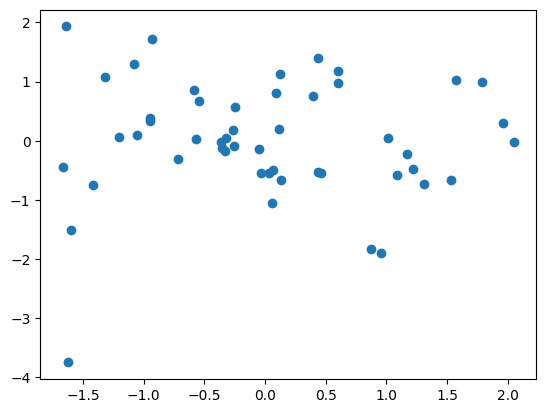

In [ ]:
#There is no pattern between standardized fitted values(PV) and standardized residual values(errors)
#model is good
def get_standardized_values( vals ):return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))

Q-Q Plots-Not all residuals are lying on starignt line. There are outliers influencing Variables

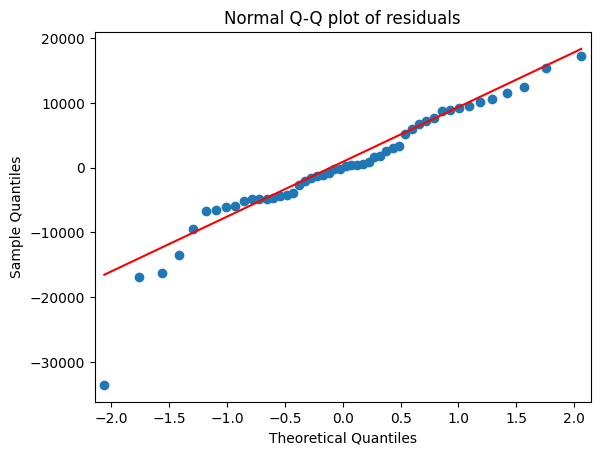

In [ ]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line="q")
plt.title("Normal Q-Q plot of residuals")
plt.show()

Regressors vs Residual

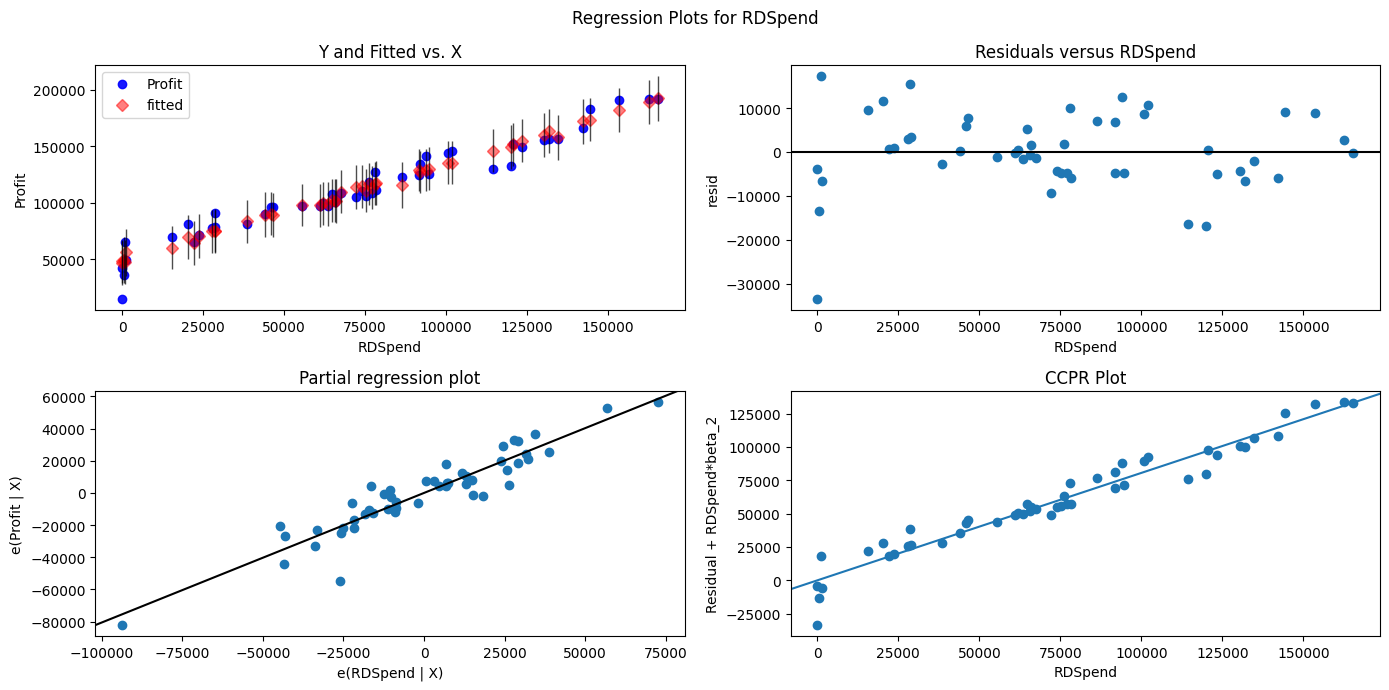

In [ ]:
#RDSpend is a significant variable
fig = plt.figure(figsize=(14,7))
fig = sm.graphics.plot_regress_exog(model, "RDSpend", fig=fig)

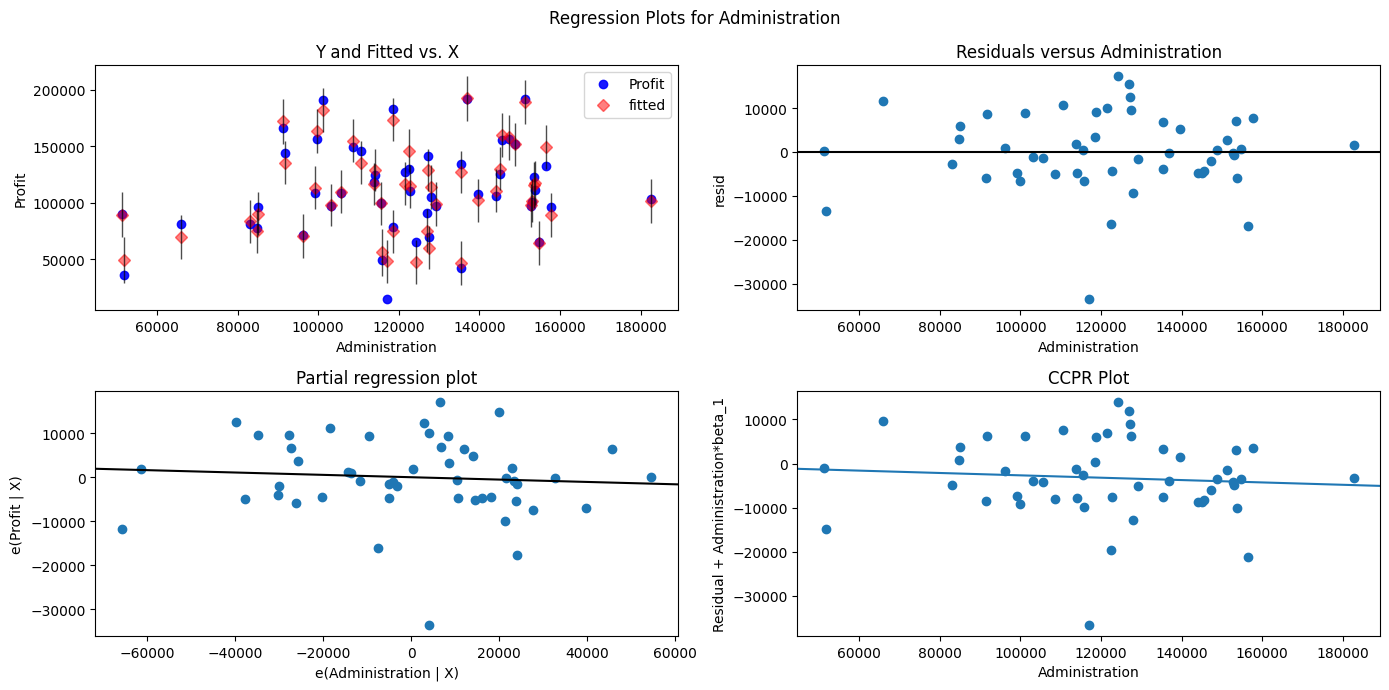

In [ ]:
#No Patterns are found with Administartion Variable. Which means Adminstraion Variable's contribution towards Profits are less
fig = plt.figure(figsize=(14,7))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)

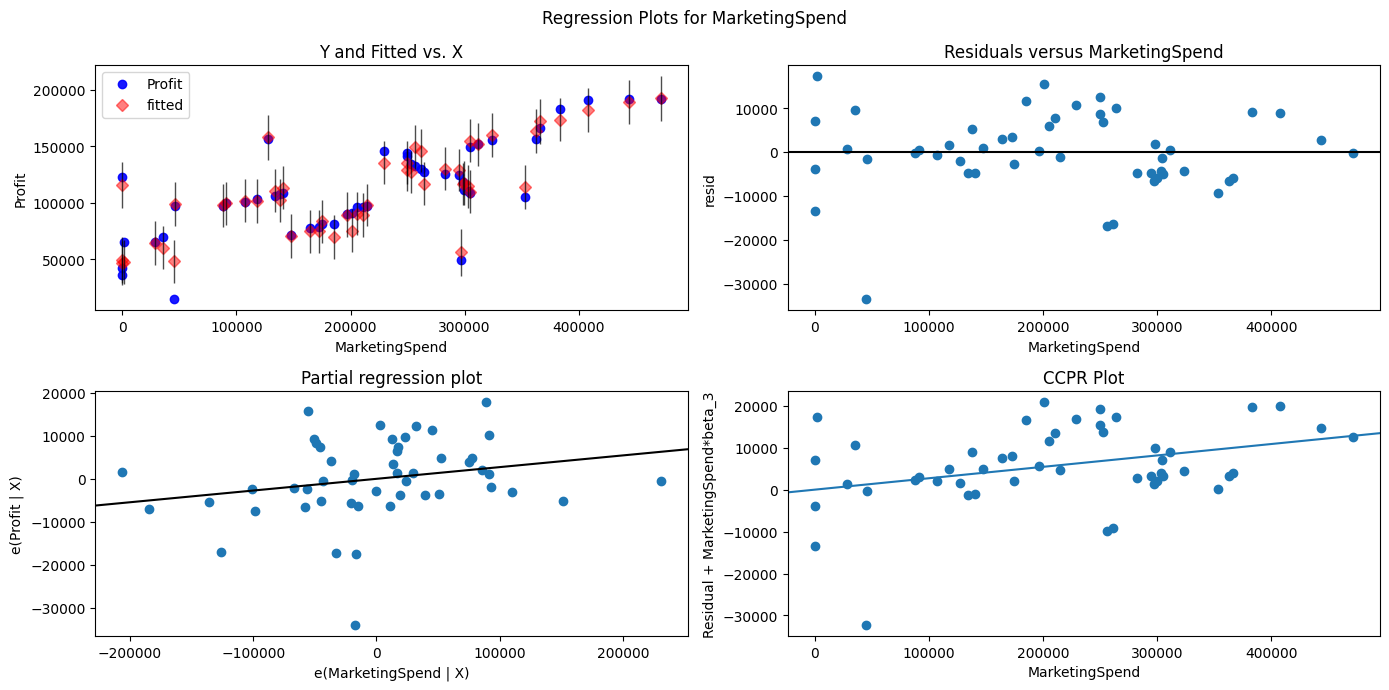

In [ ]:
#Not much patterns are found with Marketing Spend Variable. Which means marketing variable's contribution towards Profits are less
fig = plt.figure(figsize=(14,7))
fig = sm.graphics.plot_regress_exog(model, "MarketingSpend", fig=fig)

Dectecting Outliers/Influencers

In [ ]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

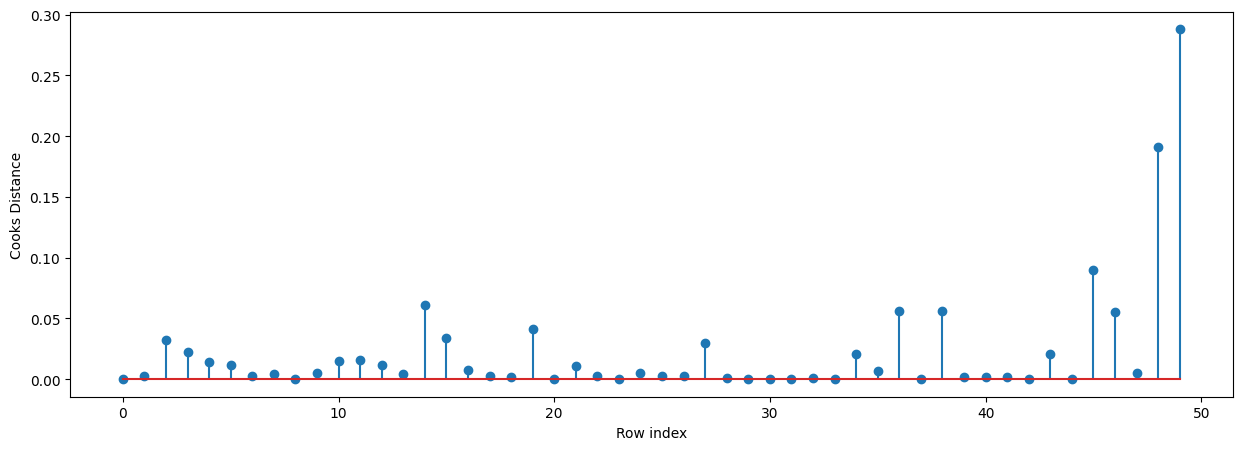

In [ ]:
fig = plt.subplots(figsize=(15, 5))
plt.stem(np.arange(len(su1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432673)

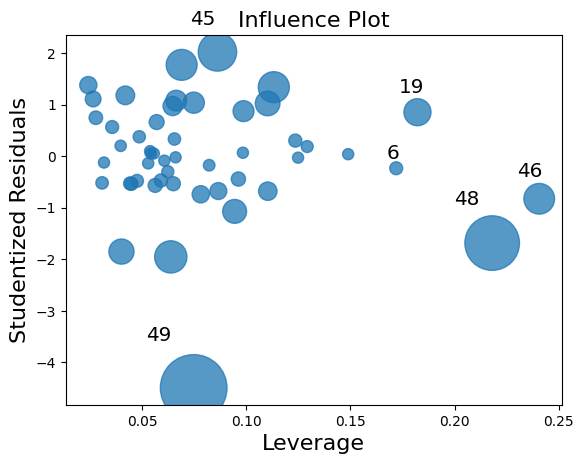

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [ ]:
k = 3
n = 50
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.24

In [ ]:
#cooks distance for observations are not >1 to consider outliers however argmax shows one observation 49
#to be different.
su1[su1.index.isin([49])]

,RDSpend,Administration,MarketingSpend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [ ]:
su1.head()

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
#Discard outliers
su_new=su1.drop(su1.index[[49]],axis=0).reset_index()
su_new

,index,RDSpend,Administration,MarketingSpend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
su_new=su_new.drop(["index"],axis=1)
su_new

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
#When compared to previous model Rsquared improved to 0.961 and Adj,Rsquared value is 0.959 by removing 1 outlier
model1=smf.ols('Profit~Administration+RDSpend+MarketingSpend',data=su_new).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           8.85e-32
Time:                        17:14:14   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
Administration    -0.0222      0.043     -0.518      0.607      -0.109       0.064
RDSpend            0.7830      0.038     20.470      0.000       0.706       0.860
MarketingSpend     0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model_influence1 = model1.get_influence()
(c1, _) = model_influence1.cooks_distance

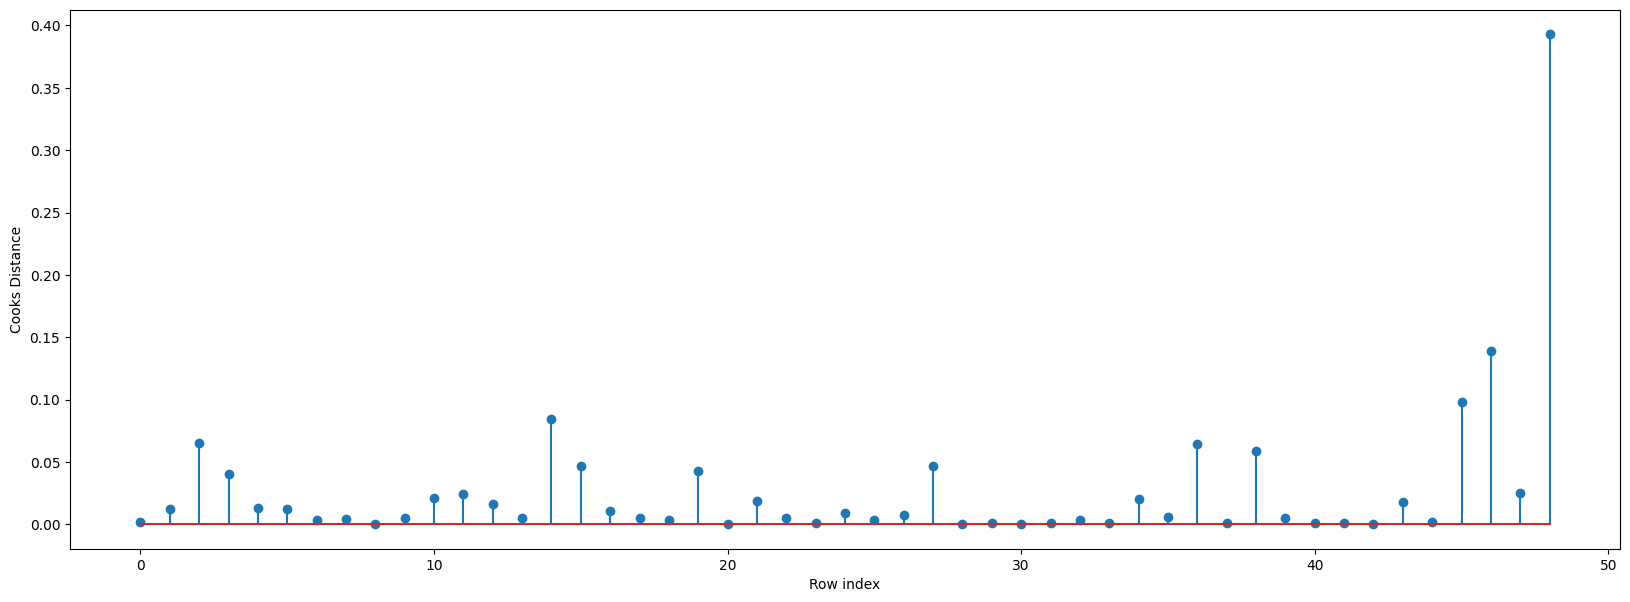

In [ ]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(su_new)),np.round(c1,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
(np.argmax(c1),np.max(c1))

(48, 0.39274420556321443)

In [ ]:
su_new[su_new.index.isin([48])]

,RDSpend,Administration,MarketingSpend,State,Profit
48,542.05,51743.15,0.0,New York,35673.41


In [ ]:
su_new1=su_new.drop(su_new.index[[48]],axis=0).reset_index()
su_new1

,index,RDSpend,Administration,MarketingSpend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
#Stop building new model here because the not mauh changed with R-squared and Adj R-Squared Value
model2=smf.ols('Profit~Administration+RDSpend+MarketingSpend',data=su_new1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           2.03e-31
Time:                        17:16:38   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
Administration    -0.0633      0.044     -1.442      0.156      -0.152       0.025
RDSpend            0.7895      0.036     21.718      0.000       0.716       0.863
MarketingSpend     0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model2.predict(su_new1.iloc[0:5,])

0    188939.277484
1    185378.579127
2    180724.354190
3    172036.176973
4    171688.341312
dtype: float64

In [ ]:
#predict profits on the entire dataset
pred = model2.predict(su_new1)
pred

0     188939.277484
1     185378.579127
2     180724.354190
3     172036.176973
4     171688.341312
5     163022.000480
6     158209.614122
7     158220.907984
8     150109.699290
9     154738.693091
10    136423.996608
11    136983.077541
12    129358.856016
13    127411.303969
14    148209.733354
15    146169.352040
16    117452.473394
17    129413.398834
18    129283.715044
19    117601.471936
20    117133.061217
21    116309.227099
22    114863.211696
23    110864.900559
24    116009.988463
25    103641.278061
26    111704.162860
27    113893.992032
28    101671.536476
29    103009.366384
30    102256.729372
31     99182.294414
32    101752.157668
33    100008.334349
34     89323.295403
35     93510.860091
36     77077.516667
37     93971.553437
38     74021.946441
39     87240.005930
40     77209.481295
41     78532.184335
42     74169.833041
43     63870.996869
44     67279.610923
45     52055.366556
46     57819.901390
47     50519.334182
dtype: float64